In [74]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/Clean_Dataset.csv')

In [75]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [77]:
df = df.drop(columns=['flight'])

In [78]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [79]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [80]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


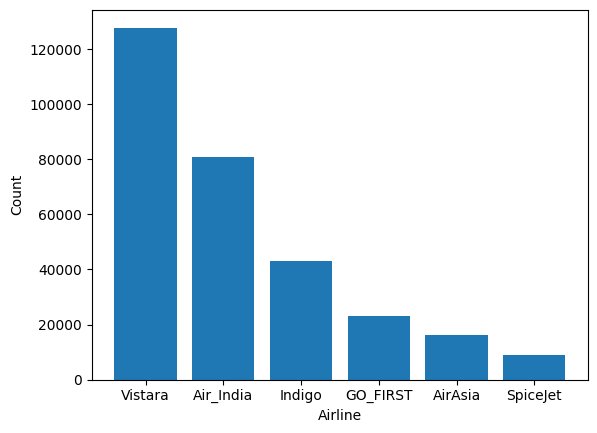

In [81]:
import matplotlib.pyplot as plt

air_count = df['airline'].value_counts()

plt.bar(air_count.index, air_count)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

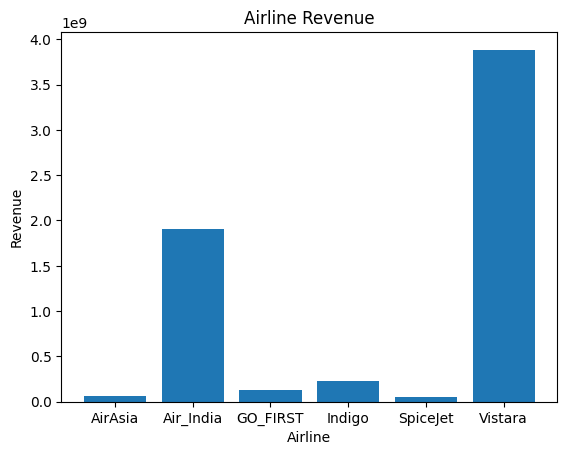

In [82]:
value_airline = df['price'].groupby(df['airline']).sum()
plt.bar(value_airline.index,value_airline)
plt.xlabel('Airline')
plt.ylabel('Revenue')
plt.title('Airline Revenue')
plt.show()

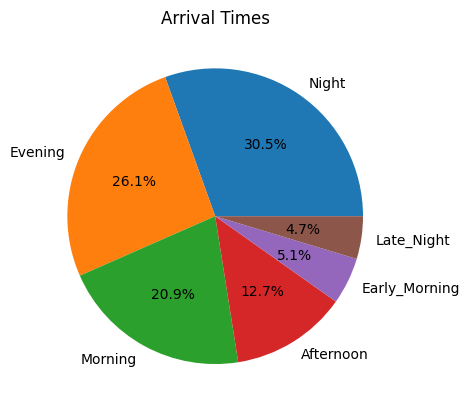

In [83]:
at = df['arrival_time'].value_counts()
plt.pie(at, labels=at.index, autopct='%1.1f%%')
plt.title('Arrival Times')
plt.show()

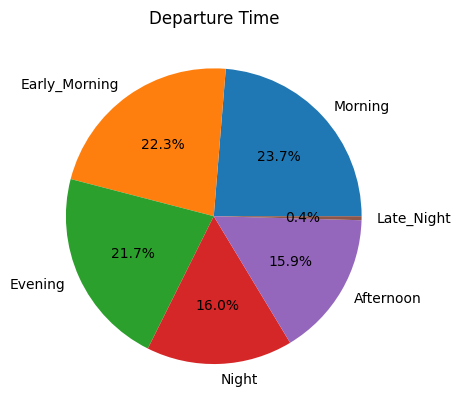

In [84]:
dt = df['departure_time'].value_counts()
plt.pie(dt, labels=dt.index, autopct='%1.1f%%')
plt.title('Departure Time')
plt.show()

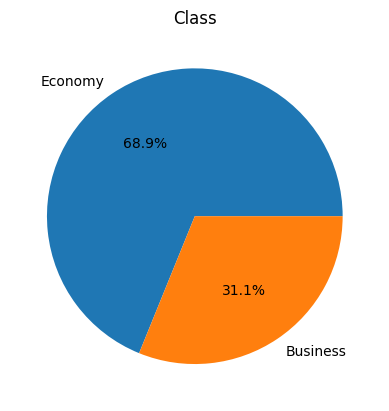

In [85]:
cl = df['class'].value_counts()
plt.pie(cl, labels=cl.index, autopct='%1.1f%%')
plt.title('Class')
plt.show()

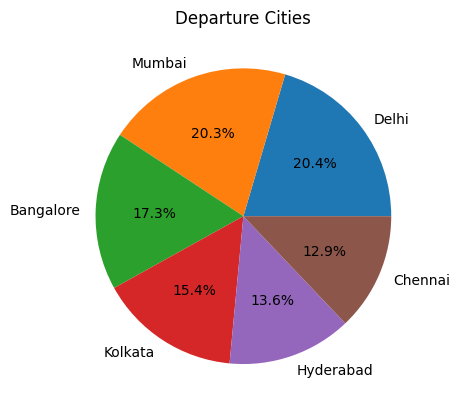

In [86]:
frm = df['source_city'].value_counts()
plt.pie(frm, labels=frm.index, autopct='%1.1f%%')
plt.title('Departure Cities')
plt.show()

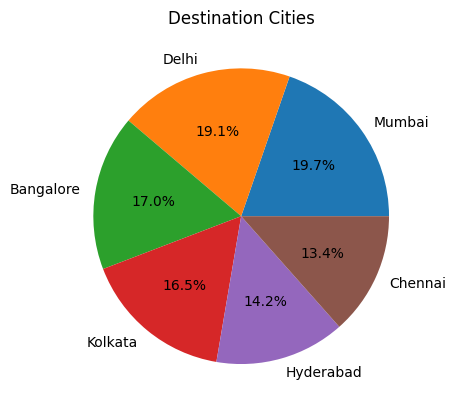

In [87]:
dst = df['destination_city'].value_counts()
plt.pie(dst, labels=dst.index, autopct='%1.1f%%')
plt.title('Destination Cities')
plt.show()

In [88]:
df['stops'] = df['stops'].str.strip().replace({'zero': 0, 'one': 1, 'two_or_more': 2})       # 'zero', 'one', 'two_or_more'
df.head()

C:\Users\Maharshi\AppData\Local\Temp\ipykernel_8472\1553871350.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['stops'] = df['stops'].str.strip().replace({'zero': 0, 'one': 1, 'two_or_more': 2})       # 'zero', 'one', 'two_or_more'


,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [89]:
df['class'] = df['class'].str.strip().replace({'Economy' : 0, 'Business' : 1})
df.head()

C:\Users\Maharshi\AppData\Local\Temp\ipykernel_8472\1527878762.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].str.strip().replace({'Economy' : 0, 'Business' : 1})


,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [90]:
cat_cols = ['airline','source_city','departure_time','arrival_time','destination_city']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True) 

In [91]:
df.head()

,Unnamed: 0,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,2.17,1,5953,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
1,1,0,0,2.33,1,5953,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,2,0,0,2.17,1,5956,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,3,0,0,2.25,1,5955,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,4,0,0,2.33,1,5955,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [92]:
df.columns

Index(['Unnamed: 0', 'stops', 'class', 'duration', 'days_left', 'price',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [93]:
X = df.drop(columns=['price'])
y = df['price']

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [113]:
from sklearn.preprocessing import StandardScaler

# Scale only numeric columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [114]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Train R^2:", model.score(X_train, y_train))
print("Test R^2:", model.score(X_test, y_test))

Train R^2: 0.9107725478043806
Test R^2: 0.9102914272796827


In [115]:
y_pred = model.predict(X_test)

In [116]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f'Mean square error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')

Mean square error: 46888997.720540255
Mean Absolute Error: 4501.241269299447
Root Mean Square Error: 6847.554141482947


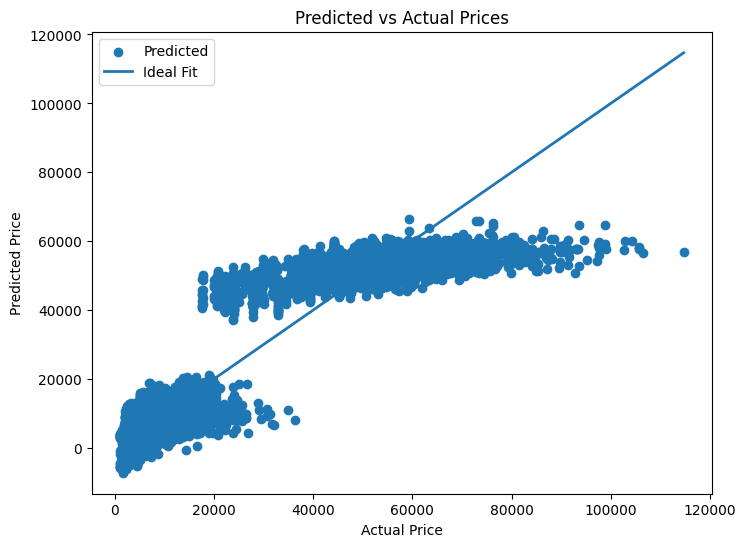

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, label='Ideal Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()